# Pizza Sales Data Analysis  

## 1. Introduction  
This notebook analyzes pizza sales data by merging multiple datasets, cleaning them, and exploring sales performance using visualizations.  

## 2. Importing Libraries  
We begin by importing the necessary Python libraries:  
- **Pandas** for data manipu
-  **NumPy** for numerical operations. ations.  
- **Matplotlib** for data visualization.  


In [137]:
# Load essential libraries for data manipulation (pandas), numerical computation (numpy), and visualization (matplotlib)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading Datasets  
We are working with four CSV files that capture different aspects of pizza sales:  

- **order_details.csv** → Contains details of each pizza in an order (order ID, pizza ID, quantity).  
- **orders.csv** → Contains order-level data, including dates and times.  
- **pizza_types.csv** → Contains pizza categories and descriptions.  
- **pizzas.csv** → Contains pizza sizes and prices.  

These datasets will later be merged to create a single, unified dataset for analysis.  


In [138]:
# Read the order_details CSV file into a pandas DataFrame
df1 = pd.read_csv(r"C:\Users\AKANBI BENJAMIN\Documents\order_details.csv")

# Read the orders CSV file into a pandas DataFrame
df2 = pd.read_csv(r"C:\Users\AKANBI BENJAMIN\Documents\orders.csv")  

# Read the 'pizza_types' CSV file into a pandas DataFrame
# Note: encoding is set to 'latin1' to handle special characters that may cause errors with default UTF-8
df3 = pd.read_csv(r"C:\Users\AKANBI BENJAMIN\Documents\pizza_types.csv", encoding="latin1") 

# Read the pizzas CSV file into a pandas DataFrame
df4 = pd.read_csv(r"C:\Users\AKANBI BENJAMIN\Documents\pizzas.csv")  

### Exploring the Data  
Before analysis, it is important to understand the structure of each dataset.  
We will:  
- Preview sample records using `.head()` to confirm columns and values.  
- Use `.info()` to inspect column datatypes, non-null counts, and memory usage.  
- Check for missing values with `.isna().sum()` to identify potential data cleaning needs.  


In [139]:
# Quick preview of the order details dataset to understand structure and sample records

df1.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [140]:
# Show a concise summary of the DataFrame (columns, data types, non-null counts, memory usage)

df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [141]:
# Count the number of missing (NaN) values in each column to identify potential data cleaning needs

df1.isna().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
dtype: int64

In [142]:
# Get the number of rows and columns in the DataFrame (shape = [rows, columns])

df1.shape

(48620, 4)

In [143]:
# Quick preview of the orders dataset to understand structure and sample records

df2.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [144]:
# Show a concise summary of the DataFrame (columns, data types, non-null counts, memory usage)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [145]:
# Count the number of missing (NaN) values in each column to identify potential data cleaning needs

df2.isna().sum()

order_id    0
date        0
time        0
dtype: int64

In [146]:
# Get the number of rows and columns in the DataFrame (shape = [rows, columns])

df2.shape

(21350, 3)

In [147]:
# Quick preview of the pizza_type dataset to understand structure and sample records

df3.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [148]:
# Show a concise summary of the DataFrame (columns, data types, non-null counts, memory usage)

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [149]:
# Count the number of missing (NaN) values in each column to identify potential data cleaning needs

df3.isna().sum()

pizza_type_id    0
name             0
category         0
ingredients      0
dtype: int64

In [150]:
# Get the number of rows and columns in the DataFrame (shape = [rows, columns])

df3.shape

(32, 4)

In [151]:
# Quick preview of the pizzas dataset to understand structure and sample records

df4.head() 

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [152]:
# Show a concise summary of the DataFrame (columns, data types, non-null counts, memory usage)

df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [153]:
# Count the number of missing (NaN) values in each column  to identify potential data cleaning needs

df4.isna().sum()

pizza_id         0
pizza_type_id    0
size             0
price            0
dtype: int64

In [154]:
# Get the number of rows and columns in the DataFrame (shape = [rows, columns])

df4.shape

(96, 4)

### Merging Datasets  
The information we need is spread across four different CSV files.  
To create a unified dataset for analysis, we perform the following merges:  
- Combine `order_details` with `orders` using the `order_id`.  
- Add pizza category information from `pizza_types`.  
- Add size and price details from `pizzas`.  

This results in a single dataset that contains all relevant details for exploration and analysis.  


In [155]:
# Merge df1 (order_details) and df2 (orders) on the common column 'order_id'
# Using an INNER JOIN ensures only matching order_ids from both DataFrames are kept

df5=pd.merge(df1, df2, on= "order_id", how= "inner" )

In [156]:
# Quick preview of the Merged df1 (order_details) and df2 (orders) dataset to understand structure and sample records

df5.head()

,order_details_id,order_id,pizza_id,quantity,date,time
0,1,1,hawaiian_m,1,2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40
2,3,2,five_cheese_l,1,2015-01-01,11:57:40
3,4,2,ital_supr_l,1,2015-01-01,11:57:40
4,5,2,mexicana_m,1,2015-01-01,11:57:40


In [157]:
# Merge df3 (pizza_type) and df4 (pizzas) on the common column 'order_id'
# Using an INNER JOIN ensures only matching order_ids from both DataFrames are kept

df6=pd.merge(df3, df4, on= "pizza_type_id", how= "inner" )

In [158]:
# Quick preview of the Merged df3 (pizza_type) and df4 (pizzas) dataset to understand structure and sample records

df6.head()

,pizza_type_id,name,category,ingredients,pizza_id,size,price
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_s,S,12.75
1,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_m,M,16.75
2,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",bbq_ckn_l,L,20.75
3,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",cali_ckn_s,S,12.75
4,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",cali_ckn_m,M,16.75


In [159]:
data = pd.merge(df5,df6, on= "pizza_id", how = "inner")

In [160]:
# Quick Preview the merged dataset (order details, orders, pizza types, and pizzas) to verify structure and sample records

data.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,name,category,ingredients,size,price
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25
2,357,146,hawaiian_m,1,2015-01-03,14:22:10,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25
3,389,163,hawaiian_m,1,2015-01-03,16:54:54,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25
4,568,247,hawaiian_m,1,2015-01-04,20:55:29,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25


In [161]:
# Show a concise summary of the DataFrame (columns, data types, non-null counts, memory usage)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   name              48620 non-null  object 
 8   category          48620 non-null  object 
 9   ingredients       48620 non-null  object 
 10  size              48620 non-null  object 
 11  price             48620 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [162]:
# Count the number of missing (NaN) values in each column to identify potential data cleaning needs

data.isna().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
date                0
time                0
pizza_type_id       0
name                0
category            0
ingredients         0
size                0
price               0
dtype: int64

In [163]:
# Check for duplicate rows in the dataset

data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48615    False
48616    False
48617    False
48618    False
48619    False
Length: 48620, dtype: bool

### Data Cleaning (Datatype Conversion)  
After merging, we checked for missing values and duplicate records.  
No missing or duplicate data was found, so no additional cleaning was required.  

The main adjustment here is **converting datatypes** — particularly transforming the `date` column into `datetime` format.  
This allows for accurate time-based analysis such as monthly or weekly trends.  


In [164]:
# Convert the 'date' column to datetime objects (infers format automatically)

data["date"]= pd.to_datetime(data["date"])

# Convert the 'time' column to datetime objects using the specific format HH:MM:SS
# This avoids warnings and ensures consistent parsing of time values

data["time"]= pd.to_datetime(data["time"], format="%H:%M:%S")

# Display the dataframe structure to confirm the changes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  48620 non-null  int64         
 1   order_id          48620 non-null  int64         
 2   pizza_id          48620 non-null  object        
 3   quantity          48620 non-null  int64         
 4   date              48620 non-null  datetime64[ns]
 5   time              48620 non-null  datetime64[ns]
 6   pizza_type_id     48620 non-null  object        
 7   name              48620 non-null  object        
 8   category          48620 non-null  object        
 9   ingredients       48620 non-null  object        
 10  size              48620 non-null  object        
 11  price             48620 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 4.5+ MB


### Exploratory Analysis – Sales Overview  
With the cleaned and merged dataset, we begin exploring sales performance.  
The focus here is to answer key questions such as:  
- How many total orders were placed?  
- How many pizzas were sold overall?  
- What is the total revenue generated?  

These basic metrics give us a high-level picture of overall business performance before diving deeper into trends and product-level insihts.  
.  

### 1. Total Revenue / Sales  
We calculate the overall revenue generated from all pizza sales. This is done by multiplying the price of each pizza by the quantity sold and summing up the results.  

In [165]:
# Create a new column 'Revenue' by multiplying the price of each pizza by the quantity sold

data["revenue"]= data["price"] * data["quantity"]

# Preview the first 5 rows to confirm the new column has been added correctly

data.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,name,category,ingredients,size,price,revenue
0,1,1,hawaiian_m,1,2015-01-01,1900-01-01 11:38:36,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,13.25
1,179,77,hawaiian_m,1,2015-01-02,1900-01-01 12:22:46,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,13.25
2,357,146,hawaiian_m,1,2015-01-03,1900-01-01 14:22:10,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,13.25
3,389,163,hawaiian_m,1,2015-01-03,1900-01-01 16:54:54,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,13.25
4,568,247,hawaiian_m,1,2015-01-04,1900-01-01 20:55:29,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",M,13.25,13.25


In [195]:
# Compute the total revenue by summing all entries in the 'revenue' column
# This gives the overall sales generated from all pizza orders

TotalRevenue= data["revenue"].sum()

# Display the total revenue value

print (f"The Total Revenue generated is : {TotalRevenue}")

The Total Revenue is : 817860.0499999999


### Total Quantity Sold  
Here we find the total number of pizza units sold across

In [196]:
# Calculate the total quantity of pizzas sold by summing the 'quantity' column

TotalQuantitySold = data["quantity"].sum()

# Display the total quantity sold

print (f"The Total Quantity of pizza sold is : {TotalQuantitySold}")

The Total Quantity of pizza sold is : 49574


### Total Orders  
We count the total number of unique orders placed in the dataset.  

In [197]:
# Count the total number of unique orders by finding the distinct values in 'order_id'

Total_orders= data["order_id"].nunique()

# Display the total number of orders

print (f"The Total orders received is : {Total_orders}")

The Total orders received is : 21350


### Number of Pizza Types Sold  
We check how many distinct pizza types are available on the menu.  


In [199]:
# Find the total number of unique pizza types sold 
# by counting distinct values in the 'pizza_type_id' column
PizzaType=data["pizza_type_id"].nunique()

print(f"They sell {PizzaType} type of pizza")

They sell 32 type of pizza


### Average Price of Pizzas  
We calculate the average selling price of pizzas across the menu.  


In [201]:
# Calculate the average price of pizzas by taking the mean of the 'price' column

Average_price=data["price"].mean()

print (f"The average price is : {Average_price}")

The average price is : 16.494132044426163


### 6. Peak Hours of Sales  
We analyze sales distribution by hour of the day to determine the busiest sales periods.  
Using a **bar chart** to clearly compare revenue or quantity per hour.  with an- Overlay  a***line char*** to show the trend of sales throughout the day.

In [202]:
# Extract the month name from the "date" column and store it in a new column "Month"

data["Hour"] = data["time"].dt.hour

# Group the data by 'Hour' and calculate the total revenue for each hour
# Then reset the index to make it a DataFrame and sort the results 
# in descending order of revenue to identify peak sales hours

HourlyRevenue = data.groupby("Hour")["revenue"].sum().reset_index().sort_values(by="revenue", ascending=False)

# Display the HourlyRevenue
print ("Hourly Revenue")
HourlyRevenue 

Hourly Revenue


,Hour,revenue
3,12,111877.90
4,13,106065.70
9,18,89296.85
8,17,86237.45
10,19,72628.90
7,16,70055.40
5,14,59201.40
11,20,58215.40
6,15,52992.30
2,11,44935.80


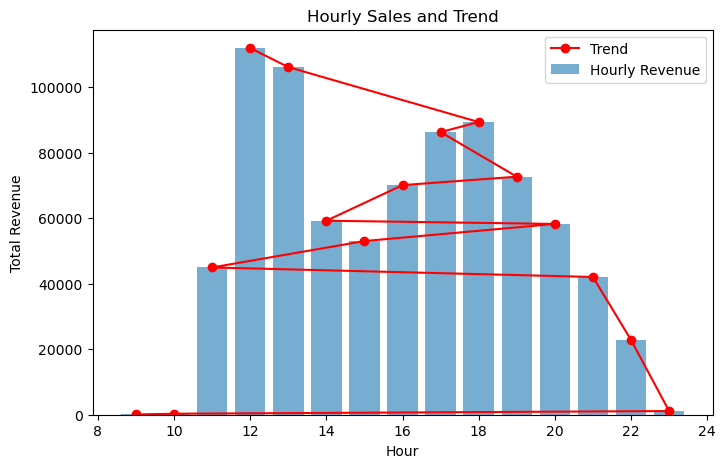

In [172]:
# Create a figure (canvas) of size 8x5 inches

plt.figure(figsize=(8,5))

# Plot bar chart for hourly revenue

plt.bar(HourlyRevenue["Hour"], HourlyRevenue["revenue"], alpha=0.6, label="Hourly Revenue")

# Overlay line chart for trend

plt.plot(HourlyRevenue["Hour"], HourlyRevenue["revenue"], color="red", marker="o", label="Trend")

# Add title and labels

plt.title("Hourly Sales and Trend")
plt.xlabel("Hour")
plt.ylabel("Total Revenue")

# Show legend

plt.legend()

# Display the chart

plt.show()


### Peak Hours of Sales: Conclusion  
Sales are highest between **12 – 14 hours (lunch)** and **16  – 20 hours (dinner)**, showing clear meal-time peaks.  
This indicates customer demand is strongly tied to typical eating hours.  


### Sales by Day of the Week  
We aggregate total sales for each day of the week to identify which day records the highest sales.  
Used a **horizontal bar chart** to compare total revenue per day.  
with an overlayed a **line chart** to visualize the weekly sales trend.

In [230]:
# Extract the day name from the "date" column and store it in a new column "days"

data["days"] = data["date"].dt.day_name()

# Group the data by 'days' and calculate the total revenue for each day
# Then reset the index to make it a DataFrame and sort the results 
# in descending order of revenue to identify peak sales days

DailyRevenue = data.groupby("days")["revenue"].sum().reset_index().sort_values(by="revenue", ascending= False)

# Display the Dily Revenue
print ("Daily Revenue")
DailyRevenue

Daily Revenue


,days,revenue
0,Friday,136073.90
4,Thursday,123528.50
2,Saturday,123182.40
6,Wednesday,114408.40
5,Tuesday,114133.80
1,Monday,107329.55
3,Sunday,99203.50


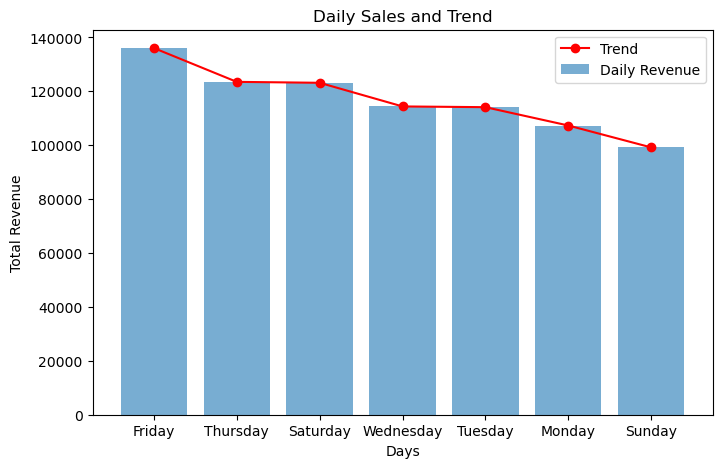

In [174]:
# Create a figure (canvas) of size 8x5 inches

plt.figure(figsize=(8,5))

# Plot bar chart for hourly revenue

plt.bar(DailyRevenue["days"], DailyRevenue["revenue"], alpha=0.6, label="Daily Revenue")

# Overlay line chart for trend

plt.plot(DailyRevenue["days"], DailyRevenue["revenue"], color="red", marker="o", label="Trend")

# Add title and labels

plt.title("Daily Sales and Trend")
plt.xlabel("Days")
plt.ylabel("Total Revenue")

# Show legend

plt.legend()

# Display the chart

plt.show()

### Sales by Day of the Week: Conclusion  
Sales are fairly steady throughout the week, but **Fridays and Saturdays record the highest revenue**.  
This suggests weekends drive stronger demand, likely due to social gatherings and leisure activities.  


### Top 5 Bestselling Pizzas  
We rank pizzas based on total quantity sold to highlight the top 5 performers.  
Using Horizontal bar chart (to make long pizza names readable).

In [204]:
# Group the data by pizza name and calculate the total quantity sold for each pizza

pizzas = data.groupby("name")["quantity"].sum().reset_index()

# Sort the pizzas in descending order based on total quantity sold

pizzas.sort_values(by="quantity", ascending=False, inplace=True)

# Display the top 5 bestselling pizzas by quantity

Top5pizzas= pizzas[:5]

# Display the Top_5 Pizzas
print ("Top 5 best selling Pizzas are :")
Top5pizzas

Top 5 best selling Pizzas are :


,name,quantity
7,The Classic Deluxe Pizza,2453
0,The Barbecue Chicken Pizza,2432
12,The Hawaiian Pizza,2422
20,The Pepperoni Pizza,2418
30,The Thai Chicken Pizza,2371


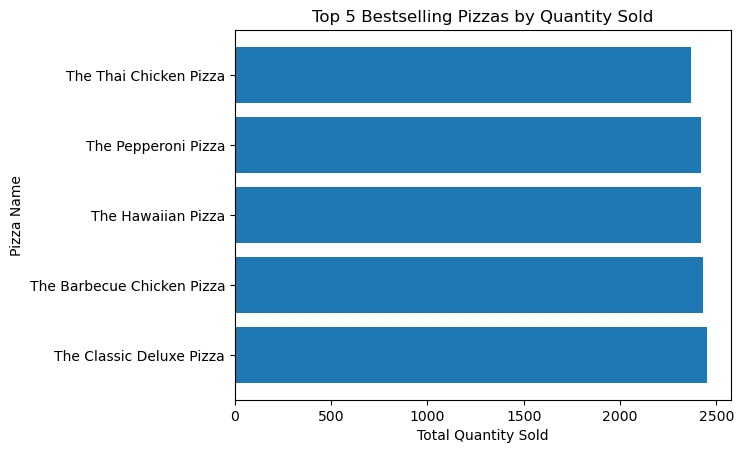

In [176]:
# Create a horizontal bar chart showing the top 5 bestselling pizzas by quantity sold

plt.barh(Top5pizzas["name"], Top5pizzas["quantity"])

# Add a title to the chart

plt.title("Top 5 Bestselling Pizzas by Quantity Sold")

# Label the x-axis as total quantity sold

plt.xlabel("Total Quantity Sold")

# Label the y-axis as pizza name

plt.ylabel("Pizza Name")

# Display the chart

plt.show()


### Top 5 Bestselling Pizzas: Conclusion  
The **Classic Deluxe Pizza** leads as the top seller with over 2,450 units sold, closely followed by the **Barbecue Chicken, Hawaiian, Pepperoni, and Thai Chicken Pizzas**.  

These top 5 pizzas all sold in similar high volumes (over 2,300 units each), showing strong and consistent customer demand.  
They are key drivers of revenue and should remain the focus of promotions and inventory planning.  



### Monthly Sales and Trends  
We calculate total sales for each month and look for noticeable seasonal or monthly patterns.  
Used a **bar chart** to display total sales per month.  
with an Overlay  **line chart** to show the trend or seasonal patterns over the months.

In [205]:
# Extract the month name from the "date" column and store it in a new column "Month"

data["month"] = data["date"].dt.month_name()

# Group the data by "Month" and calculate the total revenue for each month
# Reset index to turn the result back into a DataFrame
# in descending order of revenue to identify peak sales Months

MonthlyRevenue = data.groupby("month")["revenue"].sum().reset_index().sort_values(by="revenue", ascending = False)

# Display the Monthly Revenue
print ("Monthly Revenues are : ")
MonthlyRevenue

Monthly Revenues are : 


,month,revenue
5,July,72557.90
8,May,71402.75
7,March,70397.10
9,November,70395.35
4,January,69793.30
0,April,68736.80
1,August,68278.25
6,June,68230.20
3,February,65159.60
2,December,64701.15


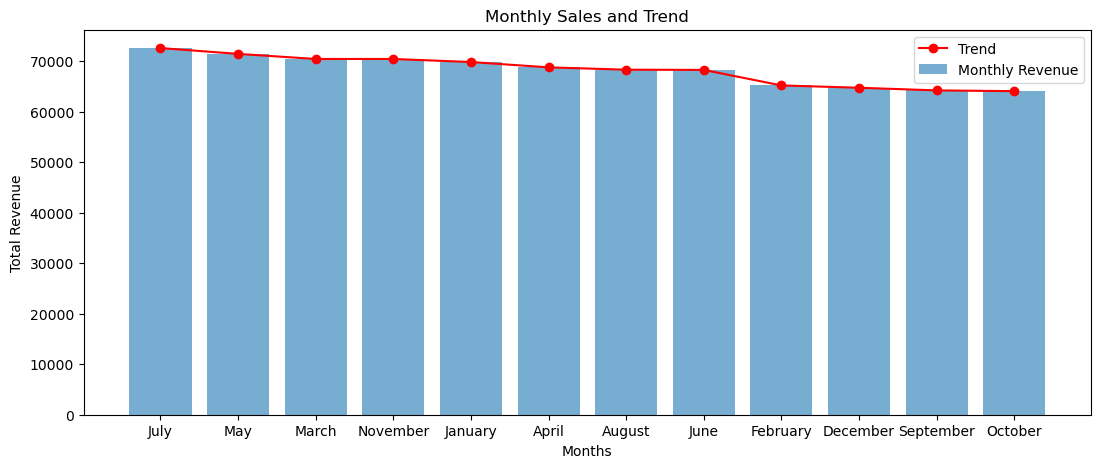

In [178]:
# Create a figure (canvas) of size 13x5 inches

plt.figure(figsize=(13,5))

# Plot bar chart for monthly revenue

plt.bar(MonthlyRevenue["month"], MonthlyRevenue["revenue"], alpha=0.6, label="Monthly Revenue")

# Overlay line chart for trend

plt.plot(MonthlyRevenue["month"], MonthlyRevenue["revenue"], color="red", marker="o", label="Trend")

# Add title and labels

plt.title("Monthly Sales and Trend")
plt.xlabel("Months")
plt.ylabel("Total Revenue")

# Show legend

plt.legend()

# Display the chart

plt.show()

### Monthly Sales Trend: Conclusion  
The sales trend shows that **July, May, and March** are the strongest months, each generating over $70,000 in revenue.  

Meanwhile, **September,** **October,** **and** **December** record the lowest sales, with revenue around $64,000.  
This indicates some **seasonal variation in demand**, with mid-year months (May–July) performing better, while the later months see weaker sales.  
Such insights can guide seasonal promotions and resource allocation to maximize revenue.  


### Underperforming Pizza Types  
We identify pizza types with the amount of quantity sold, showing which menu items are not performing well.  
Using Horizontal bar chart to visualize the worst-selling pizzas.  


In [206]:
# Group the data by pizza type ID and pizza name, then sum the quantity sold for each pizza
# Reset index to return a proper DataFrame
# Sort the pizzas in ascending order of quantity to identify low-selling pizzas

PizzaPerformance = data.groupby(["pizza_type_id", "name"])["quantity"].sum().reset_index().sort_values(by="quantity", ascending=True)

# Select the bottom 5 pizzas with the lowest quantity sold

WorstPizzas = PizzaPerformance[:5]

# Display the bottom 5 underperforming pizzas
print ("The Worst 5 Pizzas by Quantity Sold are :")
WorstPizzas

The Worst 5 Pizzas by Quantity Sold are :


,pizza_type_id,name,quantity
2,brie_carre,The Brie Carre Pizza,490
15,mediterraneo,The Mediterranean Pizza,934
3,calabrese,The Calabrese Pizza,937
28,spinach_supr,The Spinach Supreme Pizza,950
23,soppressata,The Soppressata Pizza,961


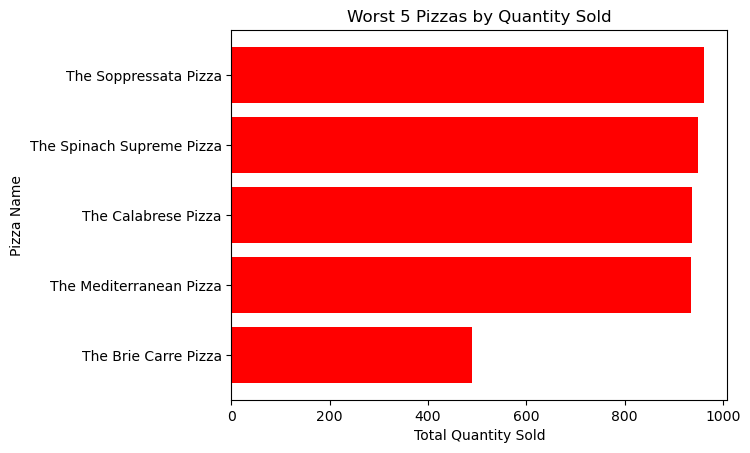

In [180]:
# Horizontal bar chart for the Worst 5 pizzas by quantity sold

plt.barh(WorstPizzas["name"], WorstPizzas["quantity"], color="red")

# Add chart title and axis labels

plt.title("Worst 5 Pizzas by Quantity Sold")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Pizza Name")

# Display the chart

plt.show()

### Underperforming Pizza Types: Conclusion  
The analysis shows that the **Brie Carre Pizza** is the least popular, selling fewer than 500 units, while other low performers like the **Mediterranean, Calabrese, Spinach Supreme, and Soppressata** pizzas each sold under 1,000 units.  

These pizzas contribute very little to overall sales, suggesting they may need **recipe improvements, targeted promotions, or possible removal** from the menu to optimize resources.  


### Further Analysis
Beyond basic metrics, we can explore deeper insights intopizza category insightr, pizzasize insighte, andcorrelation between price and quantity..


### Pizza Category Insights  

Here we check the **total quantity of pizzas sold by category** to see which groups are most popular.  



In [232]:
# Group the dataset by pizza category and calculate the total quantity sold per category.
# Reset the index to return a clean DataFrame instead of a Series.
# Sort the results in descending order to identify the best-selling categories at the top.

PizzaCategory = data.groupby(["category"])["quantity"].sum().reset_index()
PizzaCategory.sort_values(by="quantity", ascending=False, inplace=True)

print ("The total quantity sold per category are : ")

# Display the The total quantity sold per category
PizzaCategory

The total quantity sold per category are : 


,category,quantity
1,Classic,14888
2,Supreme,11987
3,Veggie,11649
0,Chicken,11050


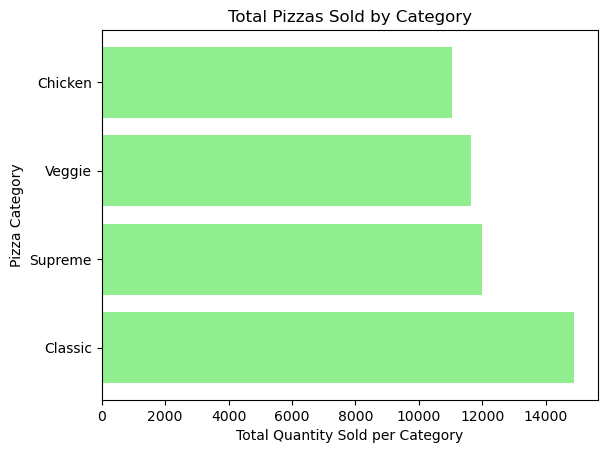

In [233]:
# Horizontal bar chart for the The total quantity sold per category
plt.barh(PizzaCategory["category"], PizzaCategory["quantity"], color="lightgreen")

# Add chart title and axis labels
plt.title("Total Pizzas Sold by Category")
plt.xlabel("Total Quantity Sold per Category")
plt.ylabel("Pizza Category")


# Display the chart

plt.show()

### Pizza Category Insights : Conclusion

Sales by pizza category show that **Classic pizzas are the most popular**, followed by **Supreme** and **Veggie pizzas**  
**Chicken** pizzas sell the least, indicating a smaller customer preference.  


### Pizza size Insights  

Here we check the **total quantity of pizzas sold by size** to see which groups are most popular.  


In [238]:
# Group the dataset by pizza size and calculate the total quantity sold for each size
Pizzas_Size = data.groupby("size")["quantity"].sum().reset_index()

# Sort the results in descending order to see which pizza size was sold the most
Pizzas_Size = Pizzas_Size.sort_values(by="quantity", ascending=False)

# Display the DataFrame with total quantity sold per size
Pizzas_Size


,size,quantity
0,L,18956
1,M,15635
2,S,14403
3,XL,552
4,XXL,28


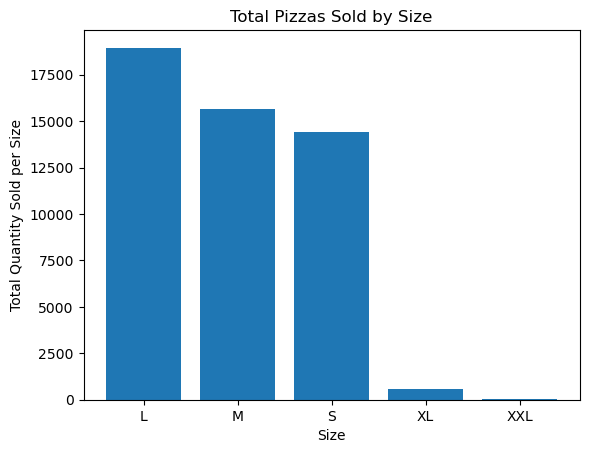

In [239]:
# Create a bar chart to show how many pizzas were sold by size
plt.bar(Pizzas_Size["size"], Pizzas_Size["quantity"])

# Add a descriptive title for the chart
plt.title("Total Pizzas Sold by Size")

# Label the x-axis to indicate it represents pizza sizes (S, M, L, XL, etc.)
plt.xlabel("Size")

# Label the y-axis to indicate it represents the total number of pizzas sold
plt.ylabel("Total Quantity Sold per Size")

# Display the plot
plt.show()


### Pizza Size Insights – Conclusion  
The analysis shows that **Large (L) pizzas are the most popular**, with nearly 19,000 sold, followed by **Medium (M)** and **Small (S)** sizes.  
Extra-large (XL) and double extra-large (XXL) pizzas contribute very little to sales, making up less than 3% of total orders.  

This suggests that customer preference is strongly centered on regular sizes (L, M, S), while oversized pizzas (XL, XXL) are rarely chosen.  


### Correlation Analysis – Price vs Quantity Sold  
Next, we check if there is a relationship between the price of a pizza and the quantity sold.  
If higher prices reduce sales, we would expect a **negative correlation**.  
If higher prices increase sales (unlikely), we would expect a **positive correlation**.  
A value close to **zero** means there is **no clear relationship*.  



In [240]:
# Calculate the correlation between pizza price and quantity sold.
corr = data["price"].corr(data["quantity"])

# Print the correlation value
print("Correlation between price and quantity sold:", corr)

# Explanation for viewers:
# Correlation values range between -1 and +1:
#   +1 → strong positive relationship (as price increases, quantity increases)
#   -1 → strong negative relationship (as price increases, quantity decreases)
#    0 → no relationship
#
# In this case, the correlation is 0.007, which is very close to 0.
# This means there is almost NO relationship between price and quantity sold.
# Customers tend to buy about the same number of pizzas regardless of price.


Correlation between price and quantity sold: 0.007142463924669933


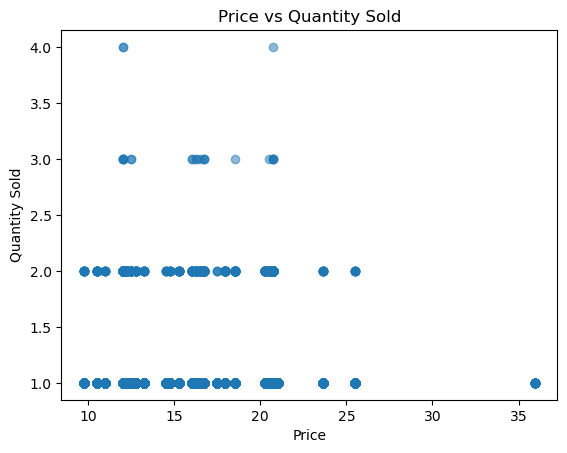

In [241]:
# Create a scatter plot with pizza price on the x-axis and quantity sold on the y-axis.
# Each point represents a pizza item/order combination.
plt.scatter(data["price"], data["quantity"], alpha=0.5)

# Label the x-axis as "Price" to show what the horizontal axis represents.
plt.xlabel("Price")

# Label the y-axis as "Quantity Sold" to indicate the vertical measure.
plt.ylabel("Quantity Sold")

# Add a title to describe what the scatter plot is showing.
plt.title("Price vs Quantity Sold")

# Render (display) the scatter plot.
plt.show()


### Correlation Analysis – Conclusion  

We measured the relationship between pizza price and quantity sold.  
The correlation value is **0.007**, which is extremely close to zero.  
This means there is **no meaningful relationship** between the two variables
The scatter plot supports this finding:  
- Most customers order **1–2 pizzas per order**, usually in the **$10–$20 range**.  
- Expensive pizzas (above $25) are rarely ordered and only in small quantities.  
- The random scatter of points confirms the correlation value: **no strong trend exists** between price and quantity.  
.  
